In [31]:
!pip install numpy
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

--Data Exploration--

In [33]:
import zipfile

zip_file_path = 'sample data set for assignment.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List files in the ZIP to confirm the CSV file name
    print(zip_ref.namelist())
    
    # Extract and read the CSV file
    with zip_ref.open('sample data set for assignment.csv') as csvfile:
        df = pd.read_csv(csvfile)

df.head()

['sample data set for assignment.csv']


,CustomerID,Age,Gender,Annual Income (LKR),Spending Score (1-100),Campaign Response,Social Media Clicks,Social Media Likes,Social Media Shares
0,1,56,Male,8118160,56,No,68,875,114
1,2,69,Female,13472669,9,Yes,386,5,77
2,3,46,Female,9609640,38,Yes,407,398,57
3,4,32,Male,5039858,90,Yes,331,463,272
4,5,60,Female,11621078,35,No,140,585,173


In [34]:
#get the no of rows and columns
df.shape

(1000000, 9)

In [35]:
df.dtypes

CustomerID                 int64
Age                        int64
Gender                    object
Annual Income (LKR)        int64
Spending Score (1-100)     int64
Campaign Response         object
Social Media Clicks        int64
Social Media Likes         int64
Social Media Shares        int64
dtype: object

In [36]:
# Display missing values in each column
df.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
Annual Income (LKR)       0
Spending Score (1-100)    0
Campaign Response         0
Social Media Clicks       0
Social Media Likes        0
Social Media Shares       0
dtype: int64

In [37]:
# Remove duplicate rows
df = df.drop_duplicates()

In [38]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Age,Annual Income (LKR),Spending Score (1-100),Social Media Clicks,Social Media Likes,Social Media Shares
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,44.001458,8.500025e+06,50.515643,249.372198,499.787390,149.667479
std,288675.278932,15.290201,3.750755e+06,28.856459,144.287736,288.724326,86.609099
min,1.000000,18.000000,2.000021e+06,1.000000,0.000000,0.000000,0.000000
25%,250000.750000,31.000000,5.248565e+06,26.000000,125.000000,250.000000,75.000000
50%,500000.500000,44.000000,8.497054e+06,51.000000,249.000000,500.000000,150.000000
75%,750000.250000,57.000000,1.174568e+07,75.000000,374.000000,750.000000,225.000000
max,1000000.000000,70.000000,1.500000e+07,100.000000,499.000000,999.000000,299.000000


In [39]:
# Gender distribution
print("\nGender distribution:")
df['Gender'].value_counts()


Gender distribution:


Gender
Female    500513
Male      499487
Name: count, dtype: int64

In [40]:
# Campaign Response distribution
print("\nCampaign Response distribution:")
df['Campaign Response'].value_counts()


Campaign Response distribution:


Campaign Response
No     700105
Yes    299895
Name: count, dtype: int64

In [41]:
# Cross-tabulation of Campaign Response by Gender
print("\nCampaign Response by Gender:")
print(pd.crosstab(df['Gender'], df['Campaign Response']))


Campaign Response by Gender:
Campaign Response      No     Yes
Gender                           
Female             350029  150484
Male               350076  149411


In [42]:
# Average Social Media Engagement by Campaign Response
print("\nAverage Social Media Engagement by Campaign Response:")
df.groupby('Campaign Response')[['Social Media Clicks', 'Social Media Likes', 'Social Media Shares']].mean()


Average Social Media Engagement by Campaign Response:


,Social Media Clicks,Social Media Likes,Social Media Shares
Campaign Response,,,
No,249.208914,499.456294,149.663588
Yes,249.753384,500.560333,149.676563


--Data Visualization--

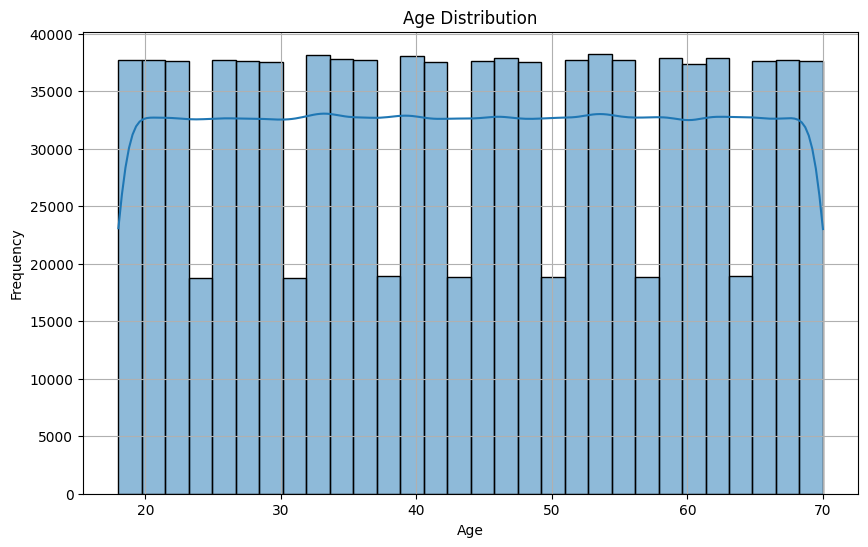

In [43]:
# Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

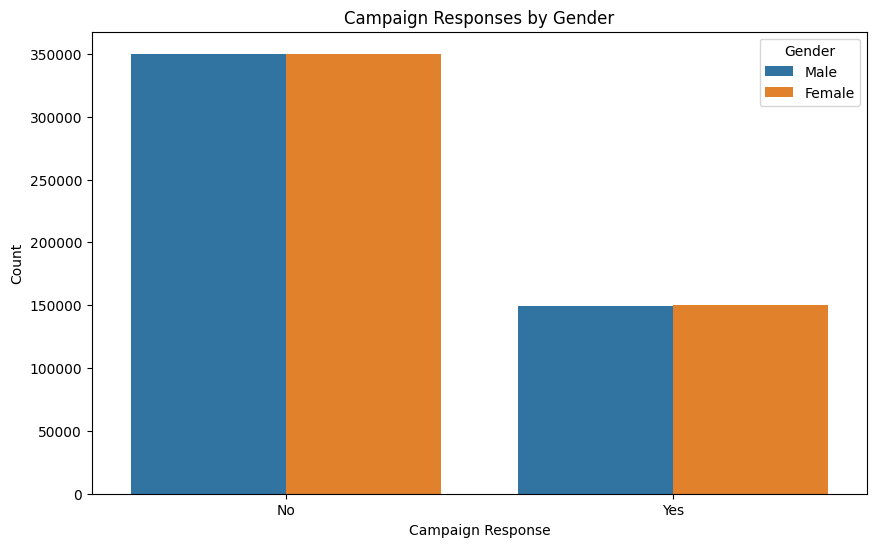

In [44]:
# Bar chart of campaign responses by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Campaign Response', hue='Gender', data=df)
plt.title('Campaign Responses by Gender')
plt.xlabel('Campaign Response')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

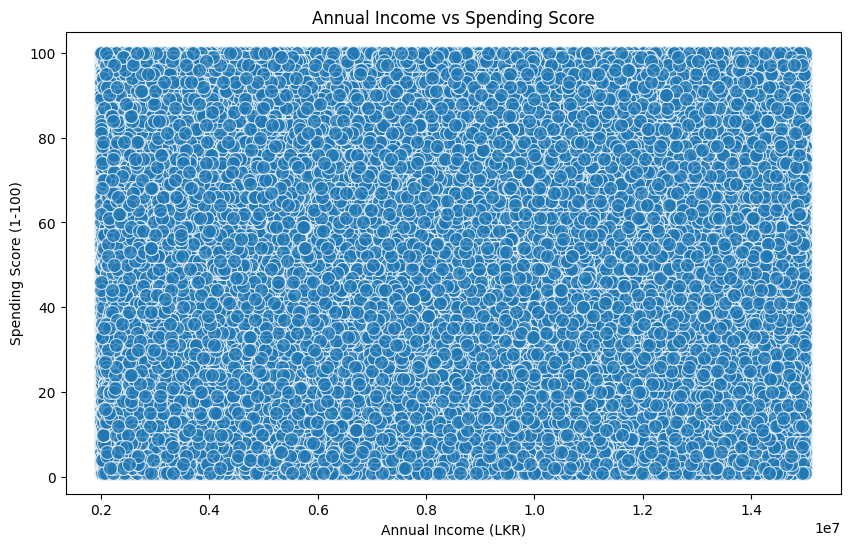

In [45]:
# Scatter plot showing the relationship between annual income (LKR) and spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (LKR)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (LKR)')
plt.ylabel('Spending Score (1-100)')
plt.show()


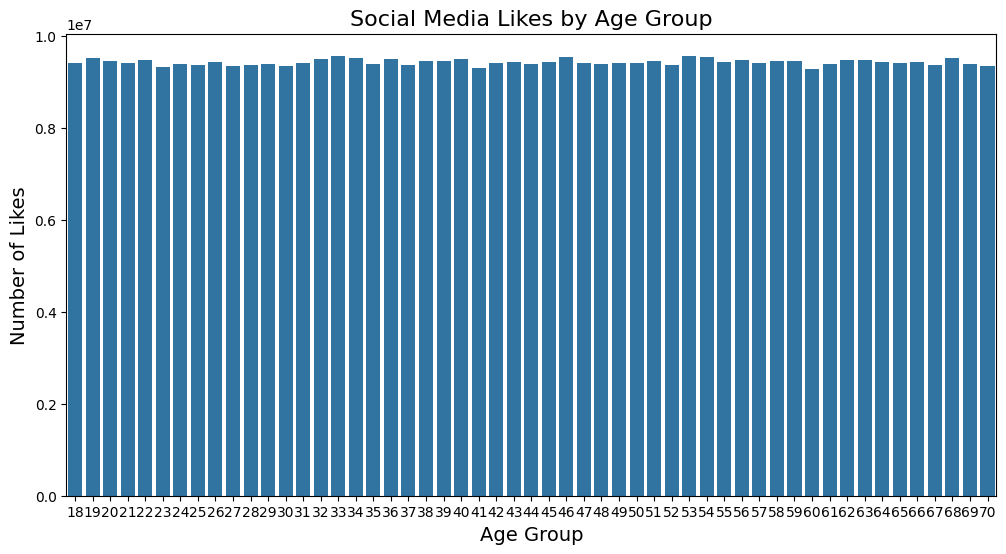

In [46]:
# Group by 'Age' and sum the 'Social Media Likes'
age_likes = df.groupby('Age')['Social Media Likes'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Social Media Likes', data=age_likes)

plt.title('Social Media Likes by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Likes', fontsize=14)

plt.show()

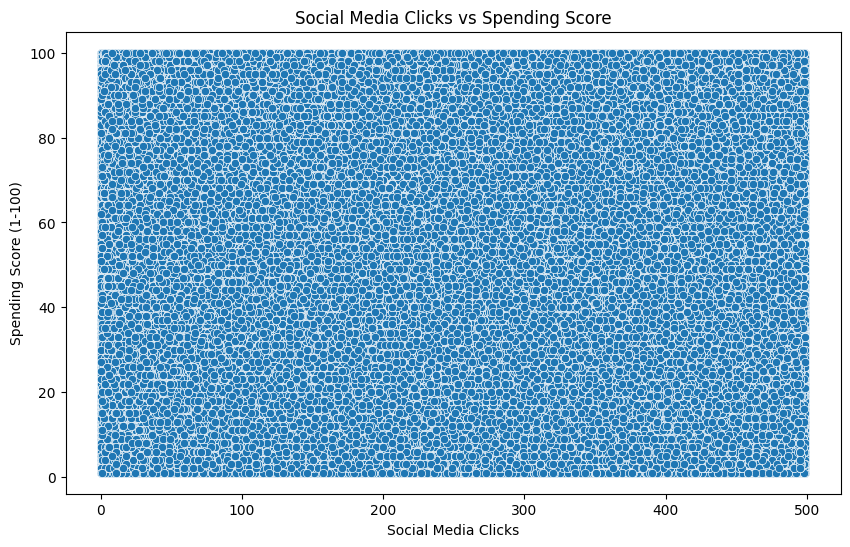

In [47]:
# Scatter plot of social media clicks versus spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social Media Clicks', y='Spending Score (1-100)', data=df)
plt.title('Social Media Clicks vs Spending Score')
plt.xlabel('Social Media Clicks')
plt.ylabel('Spending Score (1-100)')
plt.show()

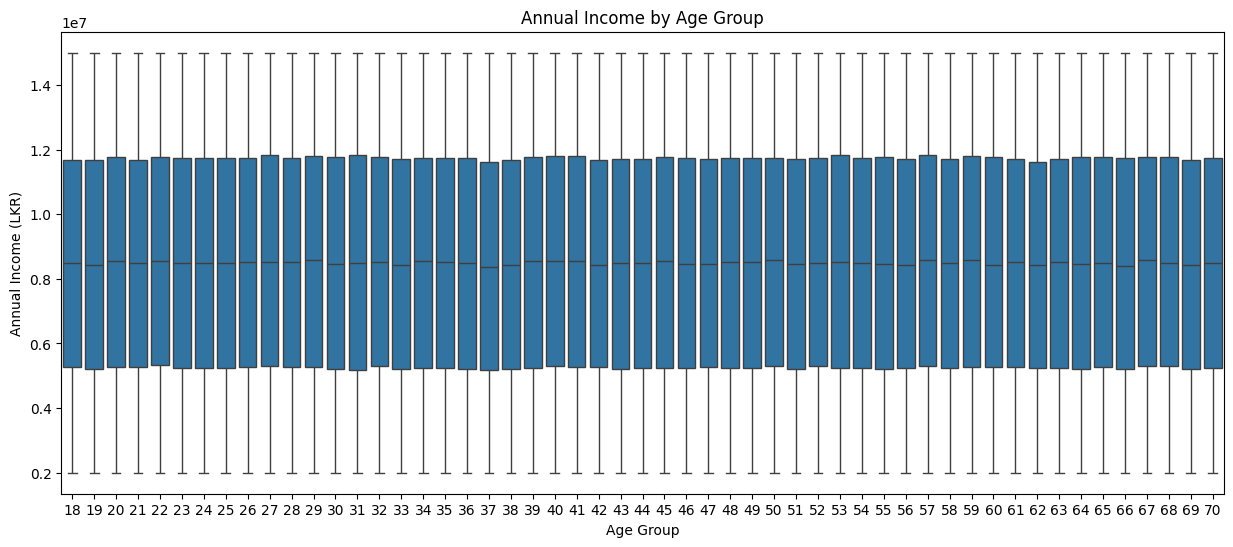

In [48]:
# Box plot of Annual Income by Age Group
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Annual Income (LKR)', data=df)
plt.title('Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (LKR)')
plt.show()

--Data Analysis--

In [49]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Logistic Regression to Predict User Conversion

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
X = df.drop(columns=['Campaign Response'])  # Features
y = df['Campaign Response']  # Target

In [52]:
#one hot encoding
X = pd.get_dummies(X)

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# Predict and evaluate the model
y_pred = model.predict(X_test)

In [56]:
# Print evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Evaluation:
Accuracy: 0.7008466666666666
Confusion Matrix:
[[210254      0]
 [ 89746      0]]
Classification Report:


C:\Users\DELL\Documents\GitHub\digital-social-media-marketing-analysis\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\Documents\GitHub\digital-social-media-marketing-analysis\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.70      1.00      0.82    210254
         Yes       0.00      0.00      0.00     89746

    accuracy                           0.70    300000
   macro avg       0.35      0.50      0.41    300000
weighted avg       0.49      0.70      0.58    300000



C:\Users\DELL\Documents\GitHub\digital-social-media-marketing-analysis\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


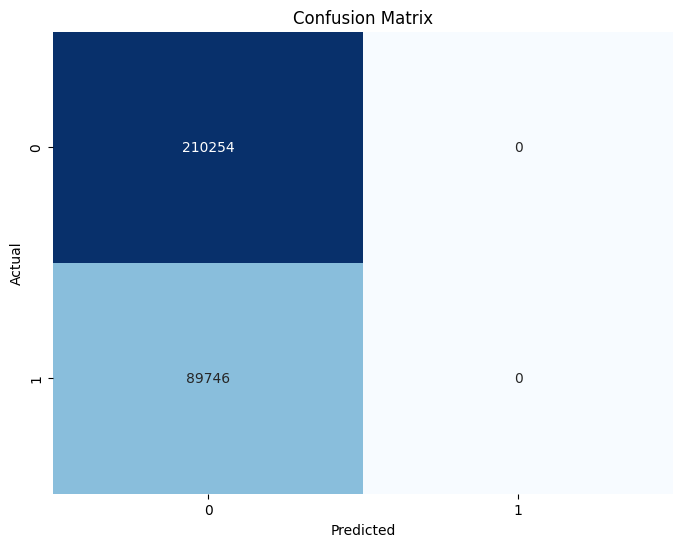

In [57]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Means Clustering to Segment Users

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [59]:
features = ['Age', 'Annual Income (LKR)', 'Spending Score (1-100)', 'Social Media Clicks', 'Social Media Likes', 'Social Media Shares']
X_clustering = df[features]


In [60]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [61]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [62]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

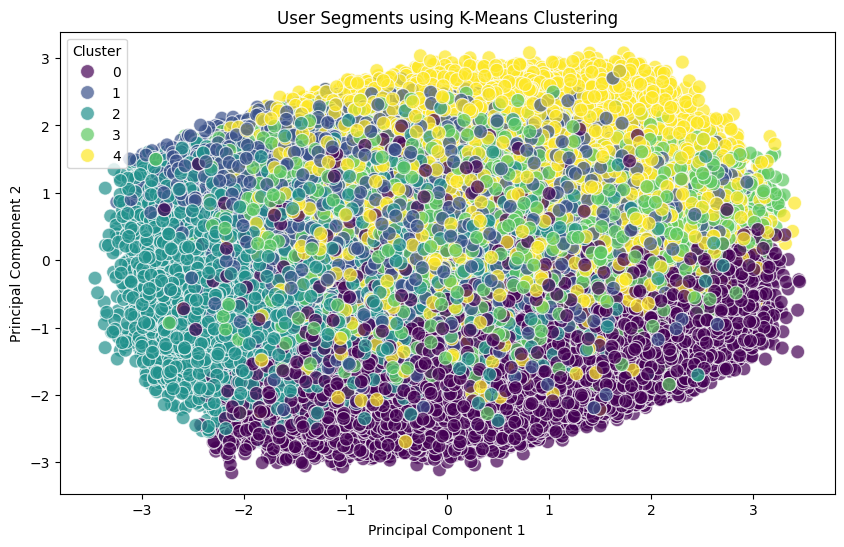

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('User Segments using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [64]:
# Analyze the characteristics of each cluster
print("Cluster Characteristics:")
print(df.groupby('Cluster')[features].mean())

Cluster Characteristics:
               Age  Annual Income (LKR)  Spending Score (1-100)  \
Cluster                                                           
0        29.790825         8.553740e+06               53.989722   
1        57.284937         8.390461e+06               76.651984   
2        35.742981         8.474574e+06               64.225927   
3        54.805626         8.566381e+06               28.756106   
4        42.878748         8.514832e+06               27.843218   

         Social Media Clicks  Social Media Likes  Social Media Shares  
Cluster                                                                
0                 284.904951          500.928946            68.897602  
1                 320.570985          497.382291           139.693500  
2                 132.829300          497.622639           220.330878  
3                 141.088862          503.596071           108.757887  
4                 369.078919          499.413380           214.386088  
